In [36]:
import os
import glob
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import pandas as pd 
import numpy as np
import string

#To plot the graphs
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn')

#library used to count the frequency of words
from sklearn.feature_extraction.text import CountVectorizer

#To create the sentiment analysis model, tokenization and lemmatization
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import word_tokenize
import nltk.data


from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet') 
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nabil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nabil\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\nabil\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [37]:
# pip install pillow
# pip install wordcloud

#### Reading Files

In [38]:
# Reading all csv files and combining into dataframe 'combined_csv'
path = "C:/Users/nabil/OneDrive/Desktop/UIC/Machine Learning/Group/MusicLyrics/csv"

os.chdir(path)
all_filenames = [i for i in glob.glob('*.{}'.format('csv'))]
combined_csv = pd.concat([pd.read_csv(f,usecols=['Artist','Title','Album','Lyric','Year']) for f in all_filenames ])

# <center> Part A: Data Cleaning

In [39]:
# Converting 'year' column from string to integer. Will be required to get the decades
combined_csv.Year.unique()
combined_csv['Year'] = pd.to_numeric(combined_csv['Year'],errors='coerce')
combined_csv = combined_csv.replace(np.nan, 0, regex=True)
combined_csv['Year'] = combined_csv['Year'].astype(int)

In [40]:
combined_csv.shape
#combined_csv.groupby(['Year']).size()
combined_csv.head(5)

,Artist,Title,Album,Lyric,Year
0,Ariana Grande,"​thank u, next","thank u, next",thought i'd end up with sean but he wasn't a m...,2018
1,Ariana Grande,7 rings,"thank u, next",yeah breakfast at tiffany's and bottles of bub...,2019
2,Ariana Grande,​God is a woman,Sweetener,you you love it how i move you you love it how...,2018
3,Ariana Grande,Side To Side,Dangerous Woman,ariana grande nicki minaj i've been here all ...,2016
4,Ariana Grande,​​no tears left to cry,Sweetener,right now i'm in a state of mind i wanna be in...,2018


In [41]:
combined_csv['Artist'].unique()

array(['Ariana Grande', 'Beyoncé', 'Billie Eilish', 'BTS (방탄소년단)',
       'Cardi B', 'Charlie Puth', 'Coldplay', 'Drake', 'Dua Lipa',
       'Ed Sheeran', 'Eminem', 'Justin Bieber', 'Katy Perry', 'Khalid',
       'Lady Gaga', 'Maroon 5', 'Nicki Minaj', 'Post Malone', 'Rihanna',
       'Selena Gomez', 'Taylor Swift'], dtype=object)

#### Below functions are required for cleaning lyrics, converting lyrics to words and creating decades using 'year' coloumn

In [42]:
def clean_lyrics(df,column):
    """
    This function cleans the words without importance and fix the format of the  dataframe's column lyrics 
    parameters:
    df = dataframe
    column = name of the column to clean
    """
    df = df
    df[column] = df[column].str.lower()
    df[column] = df[column].str.replace(r"verse |[1|2|3]|chorus|bridge|outro","").str.replace("[","").str.replace("]","")
    df[column] = df[column].str.lower().str.replace(r"instrumental|intro|guitar|solo","")
    df[column] = df[column].str.replace("\n"," ").str.replace(r"[^\w\d'\s]+","").str.replace("efil ym fo flah","")
    df[column] = df[column].str.strip()

    return df

def lyrics_to_words(document):
    """
    This function splits the text of lyrics to  single words, removing stopwords and doing the lemmatization to each word
    parameters:
    document: text to split to single words
    """
    stop_words = set(stopwords.words('english'))
    exclude = set(string.punctuation)
    lemma = WordNetLemmatizer()
    stopwordremoval = " ".join([i for i in document.lower().split() if i not in stop_words])
    punctuationremoval = ''.join(ch for ch in stopwordremoval if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punctuationremoval.split())
    return normalized

def create_decades(df):
    """
    This function creates a new column called decades used to group the songs and lyrics by decade based on the date released 
    for each song
    parameters:
    df = dataframe
    """
    decades = []
    for year in df['Year']:
        if year < 1980:
            decades.append("Missing Year")
        if 1980 <= year < 1990:
            decades.append("80s")
        if 1990 <= year < 2000:
            decades.append("90s")
        if 2000 <= year < 2010:
            decades.append("00s")
        if 2010 <= year <2020:
            decades.append("10s")
        if 2020 <= year :
            decades.append("20s")
    df['Decade'] = decades
    df = df[['Artist','Title','Album','Lyric','Year','Decade']]
    return df

# <center> Part B : Data Analysis
    a. Creating Words column from Lyrics
    b. How many albums are present in each decade 
    c. Word clouds - which words are frequent for each decade

In [43]:
#cleaning and transforming the data using functions created above
df = clean_lyrics(combined_csv,'Lyric')
print(df.shape)
df = create_decades(df)

#Filter  data to use songs that have lyrics.
df = df[df['Lyric'].notnull()]
print(df.shape)

(6027, 5)
(5981, 6)


In [44]:
def unique(list1): 
     # intilize a null list 
    unique_list = [] 
      
    # traverse for all elements 
    for x in list1: 
        # check if exists in unique_list or not 
        if x not in unique_list: 
            unique_list.append(x) 
    
    return unique_list

In [45]:
#Stores unique words of each lyrics song into a new column called words 

#list used to store the words
words = []
#iterate trought each lyric and split unique words appending the result into the words list
df = df.reset_index(drop=True)
for word in df['Lyric'].tolist():
    words.append(unique(lyrics_to_words(word).split()))

#create the new column with the information of words lists 
df['words'] = words

In [46]:
df['Unique_Words'] = df['words'].str.len()
df.head()

,Artist,Title,Album,Lyric,Year,Decade,words,Unique_Words
0,Ariana Grande,"​thank u, next","thank u, next",thought i'd end up with sean but he wasn't a m...,2018,10s,"[thought, id, end, sean, match, wrote, song, r...",96
1,Ariana Grande,7 rings,"thank u, next",yeah breakfast at tiffany's and bottles of bub...,2019,10s,"[yeah, breakfast, tiffany, bottle, bubble, gir...",134
2,Ariana Grande,​God is a woman,Sweetener,you you love it how i move you you love it how...,2018,10s,"[love, move, touch, one, said, done, believe, ...",67
3,Ariana Grande,Side To Side,Dangerous Woman,ariana grande nicki minaj i've been here all ...,2016,10s,"[ariana, grande, nicki, minaj, ive, night, day...",111
4,Ariana Grande,​​no tears left to cry,Sweetener,right now i'm in a state of mind i wanna be in...,2018,10s,"[right, im, state, mind, wanna, like, time, ai...",50


In [47]:
df.groupby(['Decade']).size()

Decade
00s              900
10s             2817
20s              448
80s                3
90s               75
Missing Year    1738
dtype: int64

In [48]:
df.groupby(['Decade'])['Unique_Words'].mean()

Decade
00s             111.692222
10s             104.358182
20s              93.104911
80s             188.666667
90s             189.506667
Missing Year     71.101841
Name: Unique_Words, dtype: float64

<AxesSubplot:xlabel='Artist'>

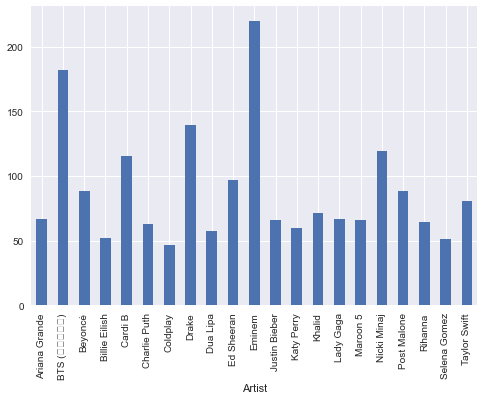

In [49]:
df.groupby(['Artist'])['Unique_Words'].mean().plot.bar()

#### We find that the songs before 2000 had more words than the ones after 2000s
#### Observed that the rappers bombared the songs with words (Eg. Eminem and Drake have lot meaningful words)

<AxesSubplot:xlabel='Artist'>

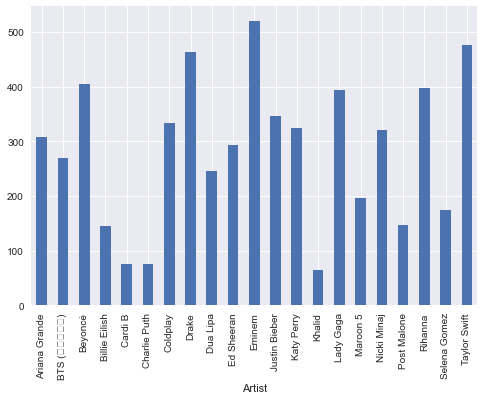

In [50]:
df.groupby(['Artist'])['Title'].count().plot.bar()

In [51]:
# #Create a new dataframe of all the  words used in lyrics and its decades 

# #list used to store the information
# set_words = []
# set_decades = []

# #Iterate trought each word and decade and stores them into the new lists
# for i in df.index:
#     for word in df['words'].iloc[i]:
#         set_words.append(word)
#         set_decades.append(df['Decade'].iloc[i])

# #create the new data frame  with the information of words and decade lists 
# words_df = pd.DataFrame({'words':set_words,'Decade':set_decades})

#### Now we create word cloud based on the decades. Along with stopwords from NLTK (english) we also include additional words in the SET stop_words

In [52]:
from PIL import Image 
stop_words = set(stopwords.words('english'))

#Defined  your own Stopwords in case the clean data function does not remove all of them
stop_words.update(['verse','im','get','1000','58','60','80','youre','youve',
               'guitar','solo','instrumental','intro','pre',"3","yo","yeah","know","i'm"])
#mask = np.array(Image.open('C:/Users/Nabila/Desktop/Machine Learning/Group/cloud.jpg'))

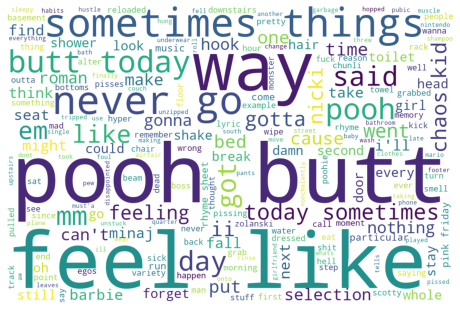

In [53]:
#import image

Eighties = ' '.join(df.loc[df['Decade']=='80s', 'Lyric'])

Eighties_wordcloud = WordCloud( 
                      #font_path='../alex-brush/AlexBrush-Regular.ttf',
                      stopwords = stop_words,
                      background_color='white',
                      #mask = mask,
                      width=1200,
                      height=800
            ).generate(Eighties)

plt.imshow(Eighties_wordcloud)
plt.axis('off')
#plt.savefig('../Images/wordcloud_80s_all_w.png', dpi=600)
plt.show()

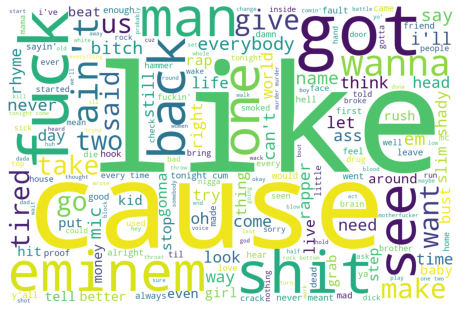

In [54]:
Nineties = ' '.join(df.loc[df['Decade']=='90s', 'Lyric'])

Nineties_wordcloud = WordCloud( 
                      #font_path='../alex-brush/AlexBrush-Regular.ttf',
                      stopwords = stop_words,
                      background_color='white',
                      width=1200,
                      height=800
            ).generate(Nineties)

plt.imshow(Nineties_wordcloud)
plt.axis('off')
#plt.savefig('../Images/wordcloud_80s_all_w.png', dpi=600)
plt.show()

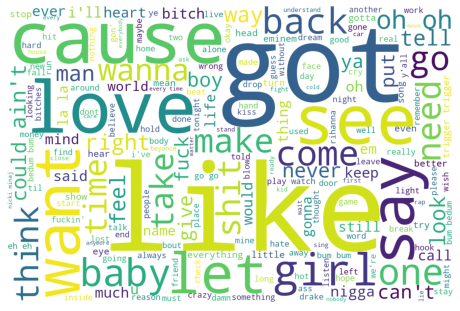

In [55]:
twoThousands = ' '.join(df.loc[df['Decade']=='00s', 'Lyric'])

twoThousands_wordcloud = WordCloud( 
                      #font_path='../alex-brush/AlexBrush-Regular.ttf',
                      stopwords = stop_words,
                      background_color='white',
                      width=1200,
                      height=800
            ).generate(twoThousands)

plt.imshow(twoThousands_wordcloud)
plt.axis('off')
#plt.savefig('../Images/wordcloud_80s_all_w.png', dpi=600)
plt.show()

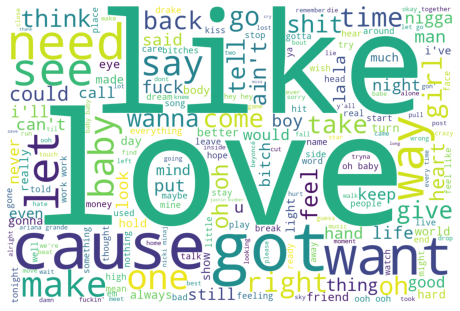

In [56]:
twentyTens = ' '.join(df.loc[df['Decade']=='10s', 'Lyric'])

twentyTens_wordcloud = WordCloud( 
                      #font_path='../alex-brush/AlexBrush-Regular.ttf',
                      stopwords = stop_words,
                      background_color='white',
                      width=1200,
                      height=800
            ).generate(twentyTens)

plt.imshow(twentyTens_wordcloud)
plt.axis('off')
#plt.savefig('../Images/wordcloud_80s_all_w.png', dpi=600)
plt.show()

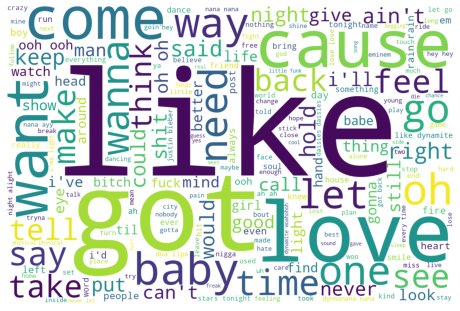

In [57]:
twentytwentys = ' '.join(df.loc[df['Decade']=='20s', 'Lyric'])

twentytwentys_wordcloud = WordCloud( 
                      #font_path='../alex-brush/AlexBrush-Regular.ttf',
                      stopwords = stop_words,
                      background_color='white',
                      width=1200,
                      height=800
            ).generate(twentytwentys)

plt.imshow(twentytwentys_wordcloud)
plt.axis('off')
#plt.savefig('../Images/wordcloud_80s_all_w.png', dpi=600)
plt.show()

## <center> Part C : Creating Sentiments (Mood of Song) from each Lyric using SentimentIntensityAnalyzer
    
    Since we do not have labels i.e mood of songs from building classification models, we need to create labels of the songs.
    One way is -> Go through each lyric and label them as Happy, Sad or Neutral
    Other Way is -> Use SentimentIntensityAnalyzer from NLTK to find the aggrgate polarity of each word in Lyric and then allocate positive, negative, neutral sentiment for the song 
    
    More Details about this can be picked up from 
    https://towardsdatascience.com/how-to-analyze-emotions-and-words-of-the-lyrics-from-your-favorite-music-artist-bbca10411283

In [58]:
#Create lists to store the different scores for each word
negative = []
neutral = []
positive = []
compound = []
#Initialize the model
sid = SentimentIntensityAnalyzer()
#Iterate for each row of lyrics and append the scores
for i in df.index:
    scores = sid.polarity_scores(df['Lyric'].iloc[i])
    negative.append(scores['neg'])
    neutral.append(scores['neu'])
    positive.append(scores['pos'])
    compound.append(scores['compound'])
#Create 4 columns to the main data frame  for each score
df['negative'] = negative
df['neutral'] = neutral
df['positive'] = positive
df['compound'] = compound
df.head()

,Artist,Title,Album,Lyric,Year,Decade,words,Unique_Words,negative,neutral,positive,compound
0,Ariana Grande,"​thank u, next","thank u, next",thought i'd end up with sean but he wasn't a m...,2018,10s,"[thought, id, end, sean, match, wrote, song, r...",96,0.062,0.503,0.435,0.9998
1,Ariana Grande,7 rings,"thank u, next",yeah breakfast at tiffany's and bottles of bub...,2019,10s,"[yeah, breakfast, tiffany, bottle, bubble, gir...",134,0.070,0.650,0.280,0.9981
2,Ariana Grande,​God is a woman,Sweetener,you you love it how i move you you love it how...,2018,10s,"[love, move, touch, one, said, done, believe, ...",67,0.000,0.733,0.267,0.9985
3,Ariana Grande,Side To Side,Dangerous Woman,ariana grande nicki minaj i've been here all ...,2016,10s,"[ariana, grande, nicki, minaj, ive, night, day...",111,0.062,0.865,0.073,0.2182
4,Ariana Grande,​​no tears left to cry,Sweetener,right now i'm in a state of mind i wanna be in...,2018,10s,"[right, im, state, mind, wanna, like, time, ai...",50,0.079,0.716,0.204,0.9936


### Sentiment of Song for Eminem, Rihanna, Drake & Taylor Swift

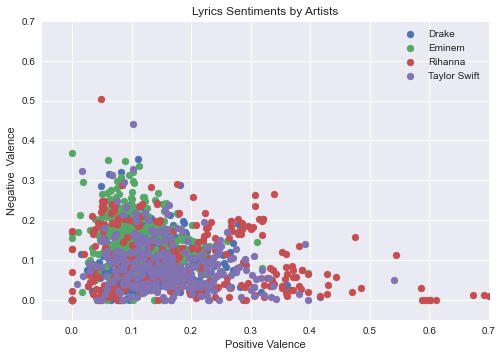

In [59]:
artist_list = ['Eminem','Rihanna','Drake','Taylor Swift']
df_2 = df.drop(df[df['Decade'] == 'Missing Year'].index)
filtered_df=df_2[df_2['Artist'].isin(artist_list)]
for name, group in filtered_df.groupby('Artist'):
    plt.scatter(group['positive'],group['negative'],label=name)
    plt.legend(fontsize=10)
plt.xlim([-0.05,0.7])
plt.ylim([-0.05,0.7])
plt.title("Lyrics Sentiments by Artists")
plt.xlabel('Positive Valence')
plt.ylabel('Negative  Valence')
plt.show()

#### Rihanna seemed to have a more positive tone to her songs

#### Create Histogram with 3 buckets to judge the cutoff cvalue for 'compound' column for assigning moods 

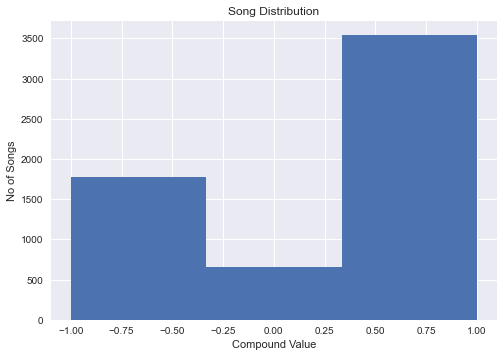

In [60]:
plt.hist(df['compound'], bins=3)
# Add labels and a title
plt.xlabel('Compound Value')
plt.ylabel('No of Songs')
plt.title('Song Distribution')

# Show the plot
plt.show()

In [97]:
def assign_mood(df):
    """
    This function creates a new column Moods using the compound metric generated through VADER
    parameters:
    df = dataframe
    """
    mood = []
    for comp in df['compound']:
        if comp < -0.3:
            mood.append("Sad")
        if -0.3 <= comp <= 0.3:
            mood.append("Neutral")
        if 0.3 < comp :
            mood.append("Happy")
    df['Mood'] = mood
    return df 

### Assigning Moods of Songs bsed on compound value

In [98]:
df_moods = assign_mood(df)
df_moods.head()

,Artist,Title,Album,Lyric,Year,Decade,words,Unique_Words,negative,neutral,positive,compound,Mood
0,Ariana Grande,"​thank u, next","thank u, next",thought i'd end up with sean but he wasn't a m...,2018,10s,"[thought, id, end, sean, match, wrote, song, r...",96,0.062,0.503,0.435,0.9998,Happy
1,Ariana Grande,7 rings,"thank u, next",yeah breakfast at tiffany's and bottles of bub...,2019,10s,"[yeah, breakfast, tiffany, bottle, bubble, gir...",134,0.070,0.650,0.280,0.9981,Happy
2,Ariana Grande,​God is a woman,Sweetener,you you love it how i move you you love it how...,2018,10s,"[love, move, touch, one, said, done, believe, ...",67,0.000,0.733,0.267,0.9985,Happy
3,Ariana Grande,Side To Side,Dangerous Woman,ariana grande nicki minaj i've been here all ...,2016,10s,"[ariana, grande, nicki, minaj, ive, night, day...",111,0.062,0.865,0.073,0.2182,Neutral
4,Ariana Grande,​​no tears left to cry,Sweetener,right now i'm in a state of mind i wanna be in...,2018,10s,"[right, im, state, mind, wanna, like, time, ai...",50,0.079,0.716,0.204,0.9936,Happy


In [99]:
df_moods['Mood'].value_counts()

Happy      3786
Sad        1799
Neutral     396
Name: Mood, dtype: int64

# <center> Part D : Model Building for Classifying Songs based on Lyric

#### Part D.1 
We need to Labelendcode column Mood to apply classification algorithms. Further we divie the dataset into 80:20 Training, Testing Datasets. Since the Classes are imbalanced, we use stratified sampling to put create balanced spit of each class in training and testng sets

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
df_moods['Mood'] = labelencoder.fit_transform(df_moods['Mood'])

X_train, X_test, y_train, y_test = train_test_split(df_moods['Lyric'], df_moods['Mood'],stratify=df_moods['Mood'],test_size=0.2)

In [105]:
y_train.value_counts()

0    3028
2    1439
1     317
Name: Mood, dtype: int64

In [106]:
y_test.value_counts()

0    758
2    360
1     79
Name: Mood, dtype: int64

### We need to do certain operations on Lyric before applying any classification algorithm
**Part D.2**

Stemming - Stemming is the process of finding the root of words.
We try with two Stemming Algorithms- Porter and Snowball. 

CountVectorizer is a great tool provided by the scikit-learn library in Python. It is used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text. 

In [107]:
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import EnglishStemmer

porter = PorterStemmer()
snowball = EnglishStemmer()

# raw words
tokenizer = lambda text: text.split()

# words after Porter stemming 
tokenizer_porter = lambda text: [porter.stem(word) for word in text.split()]

# Words after Snowball stemming
tokenizer_snowball = lambda text: [snowball.stem(word) for word in text.split()]

In [91]:
#pip install mlxtend

##### CountVectorizer is a great tool provided by the scikit-learn library in Python. It is used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text. 

In [92]:
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from mlxtend.preprocessing import DenseTransformer

vect_1 = CountVectorizer(binary=False,
                         stop_words=stop_words,
                         ngram_range=(1,1),
                         preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()),
                         tokenizer=tokenizer)

vect_2 = CountVectorizer(binary=False,
                         stop_words=stop_words,
                         ngram_range=(1,1),
                         preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()),
                         tokenizer=tokenizer_porter)
    
vect_3 = CountVectorizer(binary=False,
                         stop_words=stop_words,
                         ngram_range=(1,1),
                         preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()),
                         tokenizer=tokenizer_snowball)  


In [93]:
# done before max_features was set
print('Vocabulary sizes\n')
labels = ['CountVec', 'CountVec porter', 'CountVec snowball']

vectorizers = [vect_1, vect_2, vect_3]
for label, v in zip(labels, vectorizers):
    v.fit(X_train)
    print('%s: %s' % (label, len(v.vocabulary_)))

Vocabulary sizes

CountVec: 34978
CountVec porter: 27289
CountVec snowball: 27250


In [187]:
d_accuracy = {
     'RF Accuracy (%)':[],
     'MNB Accuracy (%)':[],
     'SVM Lin Accuracy (%)':[],
     'SVM RBF Accuracy (%)':[],
     'KMeans Accuracy (%)':[]}

d_f1_weighted = {
    'RF F1 (%)':[],
     'MNB F1 (%)':[],
     'SVM Lin F1 (%)':[],
     'SVM RBF F1 (%)':[],
     'KMeans F1 (%)':[]
}

#### Part D.3 Random Forest

In [188]:
from sklearn import metrics
from sklearn.model_selection import cross_validate
d['RF Accuracy (%)'].clear()

labels = ['CountVec', 'CountVec porter', 'CountVec snowball']
pipeline_rf = []
for v in vectorizers:
    pipeline_rf.append(Pipeline([('vect', v),
                               ('dense', DenseTransformer()),
                               ('clf', RandomForestClassifier(n_estimators=100))]))

for i,clf in enumerate(pipeline_rf):
    scores = cross_validate(estimator=clf, X=X_train, y=y_train, scoring=['accuracy','f1_weighted'], cv=3)
    print('clf %s, %s: %s' % (i+1, labels[i], scores['test_accuracy'].mean()*100))
    
    d_accuracy['RF Accuracy (%)'].append(round(scores['test_accuracy'].mean()*100,2))
    d_f1_weighted['RF F1 (%)'].append(round(scores['test_f1_weighted'].mean()*100,2))

clf 1, CountVec: 76.40056953387115
clf 2, CountVec porter: 76.96496396492071
clf 3, CountVec snowball: 76.69325540263974


#### Part D.4 Multinomial Naive Bayes Classifier

In [190]:
from sklearn.naive_bayes import MultinomialNB
pipelines_nb = []
for v in vectorizers:
    pipelines_nb.append(Pipeline([('vect', v),
                               ('dense', DenseTransformer()),
                               ('clf', MultinomialNB())]))
for i,clf in enumerate(pipelines_nb):
    scores = cross_validate(estimator=clf, X=X_train, y=y_train, scoring=['accuracy','f1_weighted'], cv=3)
    print('clf %s, %s: %s' % (i+1, labels[i], scores['test_accuracy'].mean()*100))
    d_accuracy['MNB Accuracy (%)'].append(round(scores['test_accuracy'].mean()*100,2))
    d_f1_weighted['MNB F1 (%)'].append(round(scores['test_f1_weighted'].mean()*100,2))

{'fit_time': array([3.32829428, 2.68288159, 2.62256837]), 'score_time': array([0.64155054, 0.62615299, 0.54646754]), 'test_accuracy': array([0.74294671, 0.72100313, 0.75094103]), 'test_f1_weighted': array([0.72342333, 0.69810876, 0.72688588])}
clf 1, CountVec: 73.8296957372802
{'fit_time': array([17.38654804, 17.76311016, 17.56906533]), 'score_time': array([8.30008364, 8.31643081, 7.94354892]), 'test_accuracy': array([0.74231975, 0.71222571, 0.7446675 ]), 'test_f1_weighted': array([0.72210714, 0.69084135, 0.7205121 ])}
clf 2, CountVec porter: 73.30709858940723
{'fit_time': array([11.48308206, 11.4255569 , 11.54347467]), 'score_time': array([5.28559899, 5.34146047, 5.14663792]), 'test_accuracy': array([0.74357367, 0.71661442, 0.74592221]), 'test_f1_weighted': array([0.72389897, 0.69442929, 0.72166065])}
clf 3, CountVec snowball: 73.53700986851162


#### Part D.5 SVM with Linear Kernel

In [191]:
from sklearn.svm import SVC
pipelines_svc = []
for v in vectorizers:
    pipelines_svc.append(Pipeline([('vect', v),
                               ('dense', DenseTransformer()),
                               ('clf', SVC(kernel='linear'))]))
for i,clf in enumerate(pipelines_svc):
    scores = cross_validate(estimator=clf, X=X_train, y=y_train, scoring=['accuracy','f1_weighted'], cv=3)
    print('clf %s, %s: %s' % (i+1, labels[i], scores['test_accuracy'].mean()*100))
    d_accuracy['SVM Lin Accuracy (%)'].append(round(scores['test_accuracy'].mean()*100,2))
    d_f1_weighted['SVM Lin F1 (%)'].append(round(scores['test_f1_weighted'].mean()*100,2))

clf 1, CountVec: 74.12210627890117
clf 2, CountVec porter: 73.93412339113893
clf 3, CountVec snowball: 73.82965640483056


#### Part D.6 SVM with Radial Kernel

In [192]:
pipelines_svc_radial = []
for v in vectorizers:
    pipelines_svc_radial.append(Pipeline([('vect', v),
                               ('dense', DenseTransformer()),
                               ('clf', SVC(kernel='rbf'))]))
for i,clf in enumerate(pipelines_svc_radial):
    scores = cross_validate(estimator=clf, X=X_train, y=y_train, scoring=['accuracy','f1_weighted'], cv=3)
    print('clf %s, %s: %s' % (i+1, labels[i], scores['test_accuracy'].mean()*100))
    d_accuracy['SVM RBF Accuracy (%)'].append(round(scores['test_accuracy'].mean()*100,2))
    d_f1_weighted['SVM RBF F1 (%)'].append(round(scores['test_f1_weighted'].mean()*100,2))

clf 1, CountVec: 72.51255688455535
clf 2, CountVec porter: 73.3696634060066
clf 3, CountVec snowball: 73.24427155647682


# <center> Part E : Model Building on unsupervised learning on Lyric -> K-means

In [209]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
pipelines_kmeans = []
d['KMeans Accuracy (%)'].clear()

for i,vec in enumerate(vectorizers):
    kmtrain_features = vec.fit_transform(X_train)
    kmmodel = KMeans(n_clusters=3,n_init=10 ,random_state=5)
    kmmodel.fit_predict(kmtrain_features)
    print(kmmodel.labels_)
    print('clustering %s, %s: %s' % (i+1, labels[i], accuracy_score(y_train,kmmodel.labels_)*100))
    
#     print('clf %s, %s: %s' % (i+1, labels[i], scores['test_score'].mean()*100))
    d_accuracy['KMeans Accuracy (%)'].append(round(accuracy_score(y_train,kmmodel.labels_)*100,2))

[2 0 2 ... 2 0 2]
clustering 1, CountVec: 37.85535117056856
[1 2 1 ... 1 2 1]
clustering 2, CountVec porter: 15.32190635451505
[0 2 0 ... 0 2 0]
clustering 3, CountVec snowball: 54.22240802675585


In [203]:
Algo_accu_dict= {}
Algo_accu_dict['Random Forest'] = d_accuracy['RF Accuracy (%)']
Algo_accu_dict['Multinomail Naive Bayes'] = d_accuracy['MNB Accuracy (%)']
Algo_accu_dict['SVM Linear'] = d_accuracy['SVM Lin Accuracy (%)']
Algo_accu_dict['SVM RBF'] = d_accuracy['SVM RBF Accuracy (%)']
Algo_accu_dict['KMeans Clustering'] = d_accuracy ['KMeans Accuracy (%)']

In [212]:
Algo_f1_dict

{'Random Forest': [74.41, 75.04, 74.73],
 'Multinomail Naive Bayes': [71.61, 71.12, 71.33],
 'SVM Linear': [74.4, 74.26, 74.18],
 'SVM RBF': [67.22, 68.44, 68.3]}

In [204]:
Algo_f1_dict= {}
Algo_f1_dict['Random Forest'] = d_f1_weighted['RF F1 (%)']
Algo_f1_dict['Multinomail Naive Bayes'] = d_f1_weighted['MNB F1 (%)']
Algo_f1_dict['SVM Linear'] = d_f1_weighted['SVM Lin F1 (%)']
Algo_f1_dict['SVM RBF'] = d_f1_weighted['SVM RBF F1 (%)']

### Select Algorithm with maximum accuracy and most efficient vectorizer

In [213]:
max_acc_algo = max(Algo_accu_dict, key=lambda k: max(Algo_accu_dict[k]))
max_accuracy = max(Algo_accu_dict[max_acc_algo])
max_accuracy_index = Algo_accu_dict[max_acc_algo].index(max_accuracy)
efficient_vectorizer_accu = labels[max_accuracy_index]
print("%s gave the best accuracy with vectorizer: %s with accuracy %0.2f "%(max_acc_algo, efficient_vectorizer_accu,max_accuracy))

Random Forest gave the best accuracy with vectorizer: CountVec porter with accuracy 76.96 


In [216]:
max_f1_algo = max(Algo_f1_dict, key=lambda k: max(Algo_f1_dict[k]))
max_f1 = max(Algo_f1_dict[max_f1_algo])
max_f1_index = Algo_f1_dict[max_f1_algo].index(max_f1)
efficient_vectorizer_f1 = labels[max_f1_index]
print("%s gave the best F1 Weighted Score with vectorizer: %s with F1 Score %0.2f "%(max_f1_algo, efficient_vectorizer_f1,max_f1))

Random Forest gave the best F1 Weighted Score with vectorizer: CountVec porter with F1 Score 75.04 


## <center> Part F : Test Accuracy and F1 Weighted Score with most efficient Algorithm and Vectorizer

In [220]:
from sklearn.metrics import f1_score
pipeline = Pipeline([('vect', vectorizers[max_index]),
                               ('dense', DenseTransformer()),
                               ('clf', RandomForestClassifier(n_estimators=100))])

pipeline.fit(X_train, y_train)
r2 = pipeline.score(X_test, y_test)
y_test_pred = pipeline.predict(X_test)

In [222]:
print("Test Accuracy :", str(round(r2*100,2))+'%')
print("Test F1 Weighted :", str(round(f1_score(y_test,y_test_pred,average='weighted')*100,2))+'%')

Test Accuracy : 79.2%
Test F1 Weighted : 77.7%


## <center> THE END!!!